In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import scienceplots
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot
from matplotlib.ticker import LogLocator

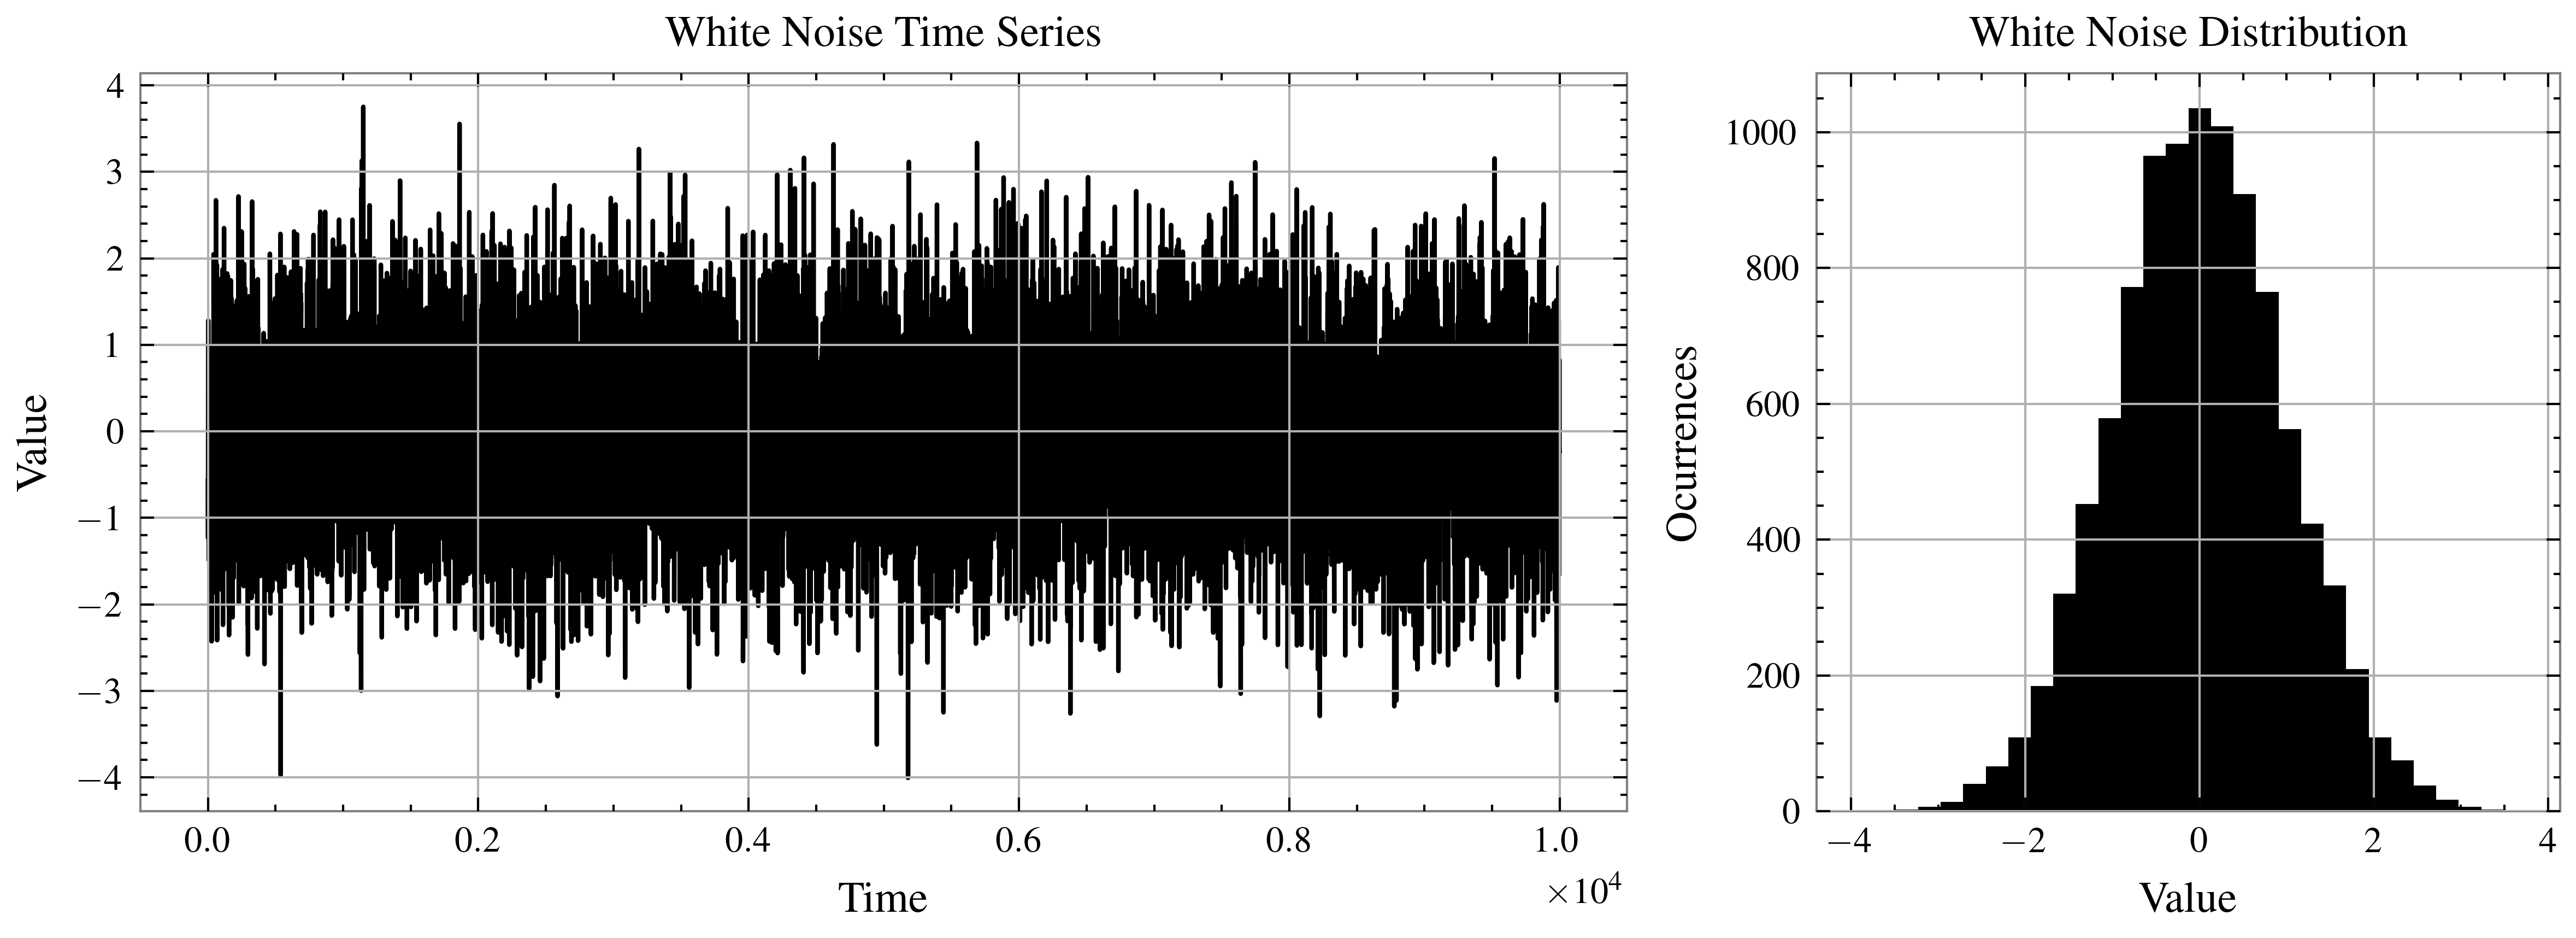

In [2]:
plt.style.use(['science', 'ieee'])

def white_noise(mean, std_dev, num_samples):
    return np.random.normal(mean, std_dev, num_samples)


noise = white_noise(0, 1, 10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3), gridspec_kw={'width_ratios': [2, 1]})

ax1.plot(noise)
ax1.set_title('White Noise Time Series')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')

ax2.hist(noise, 30)
ax2.set_title('White Noise Distribution')
ax2.set_xlabel('Value')
ax2.set_ylabel('Ocurrences')

plt.tight_layout()
fig.savefig('paperfigs/white_noise_dist.png', dpi=300)

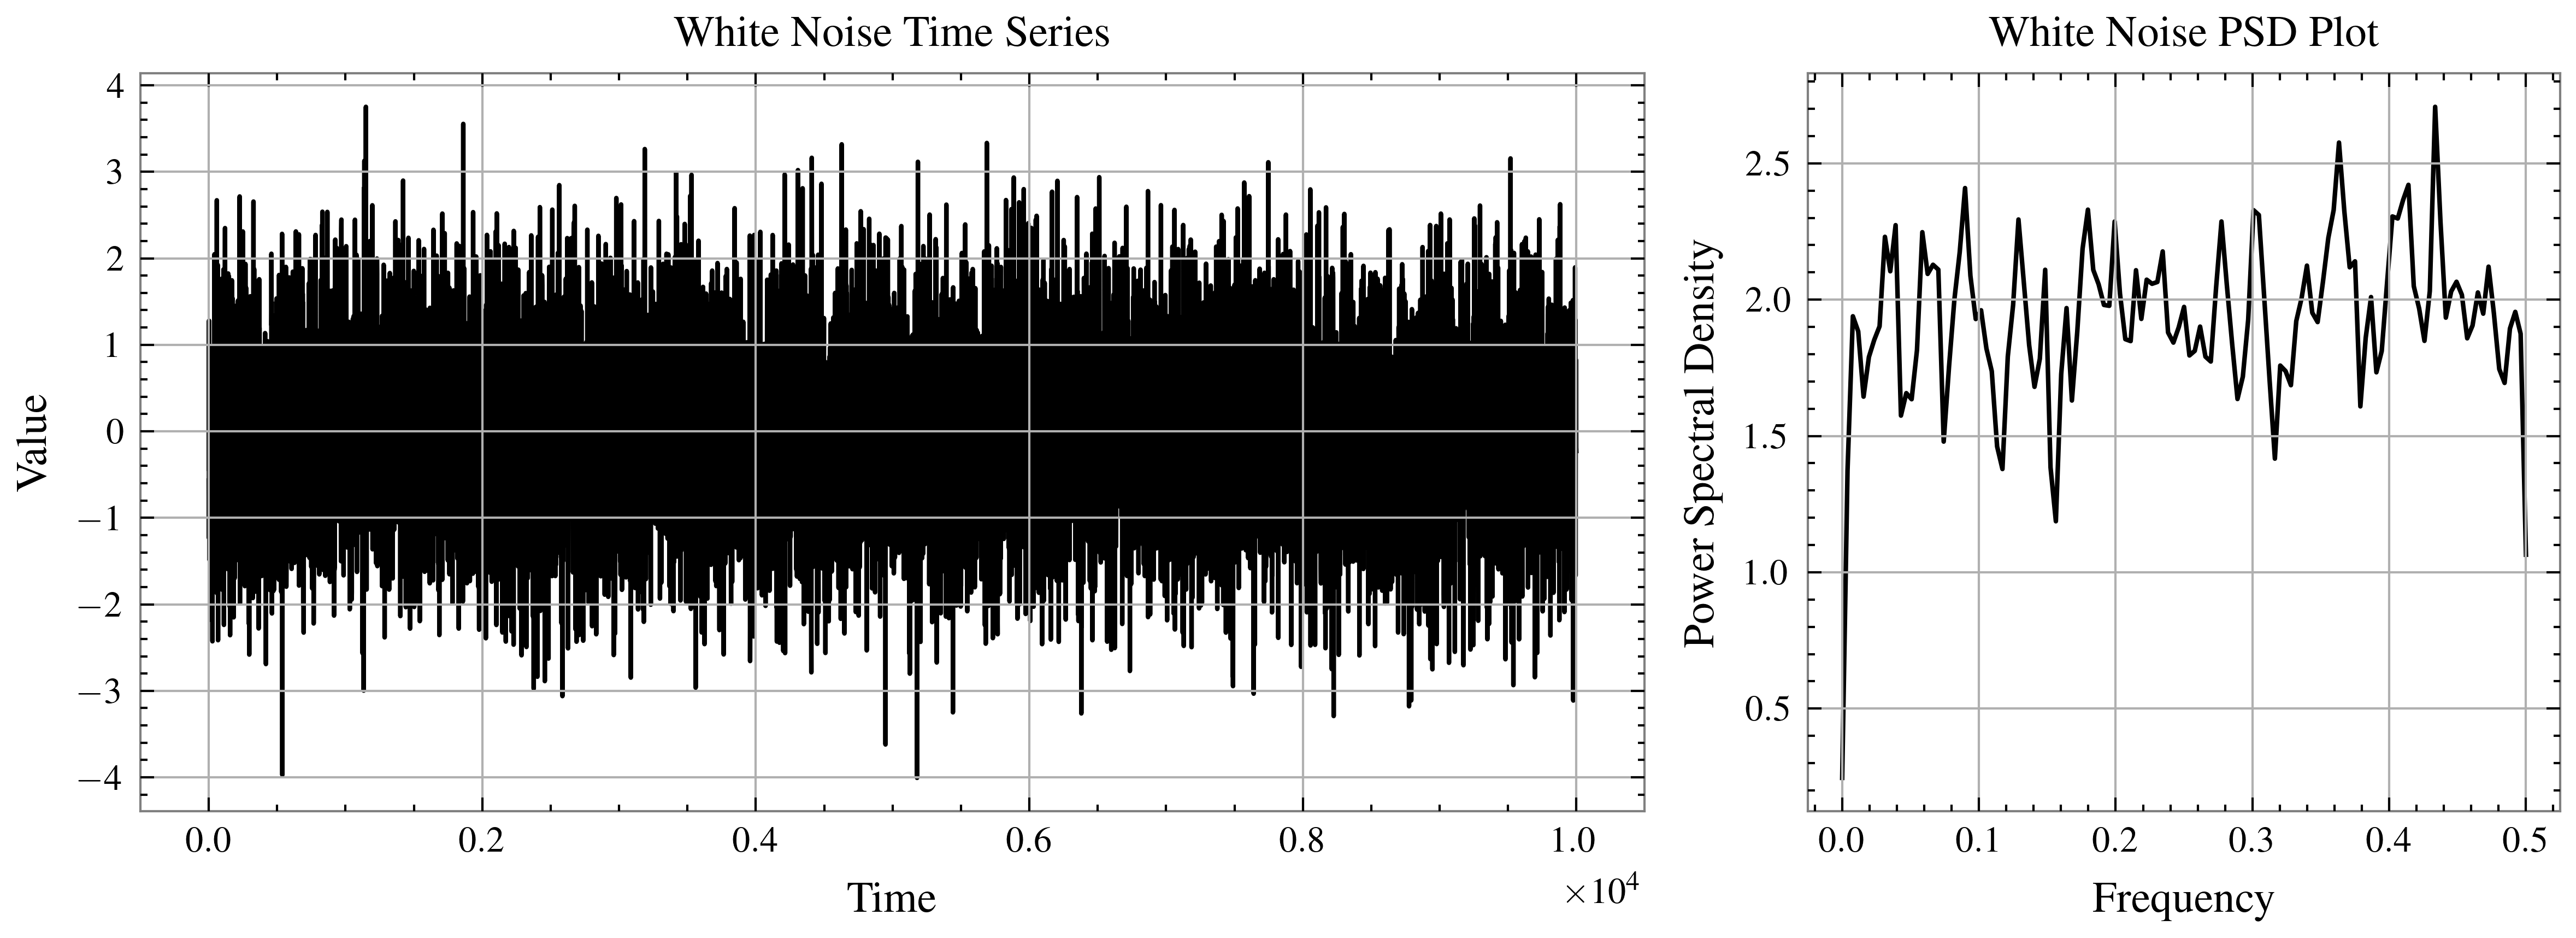

In [3]:
(frequencies, psd) = signal.welch(noise)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3), gridspec_kw={'width_ratios': [2,1]})

ax1.plot(noise)
ax1.set_title('White Noise Time Series')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')

ax2.plot(frequencies, psd)
ax2.set_title('White Noise PSD Plot')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power Spectral Density')

plt.tight_layout()
fig.savefig('paperfigs/white_noise_psd.png', dpi=300)

In [4]:
hdata = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)

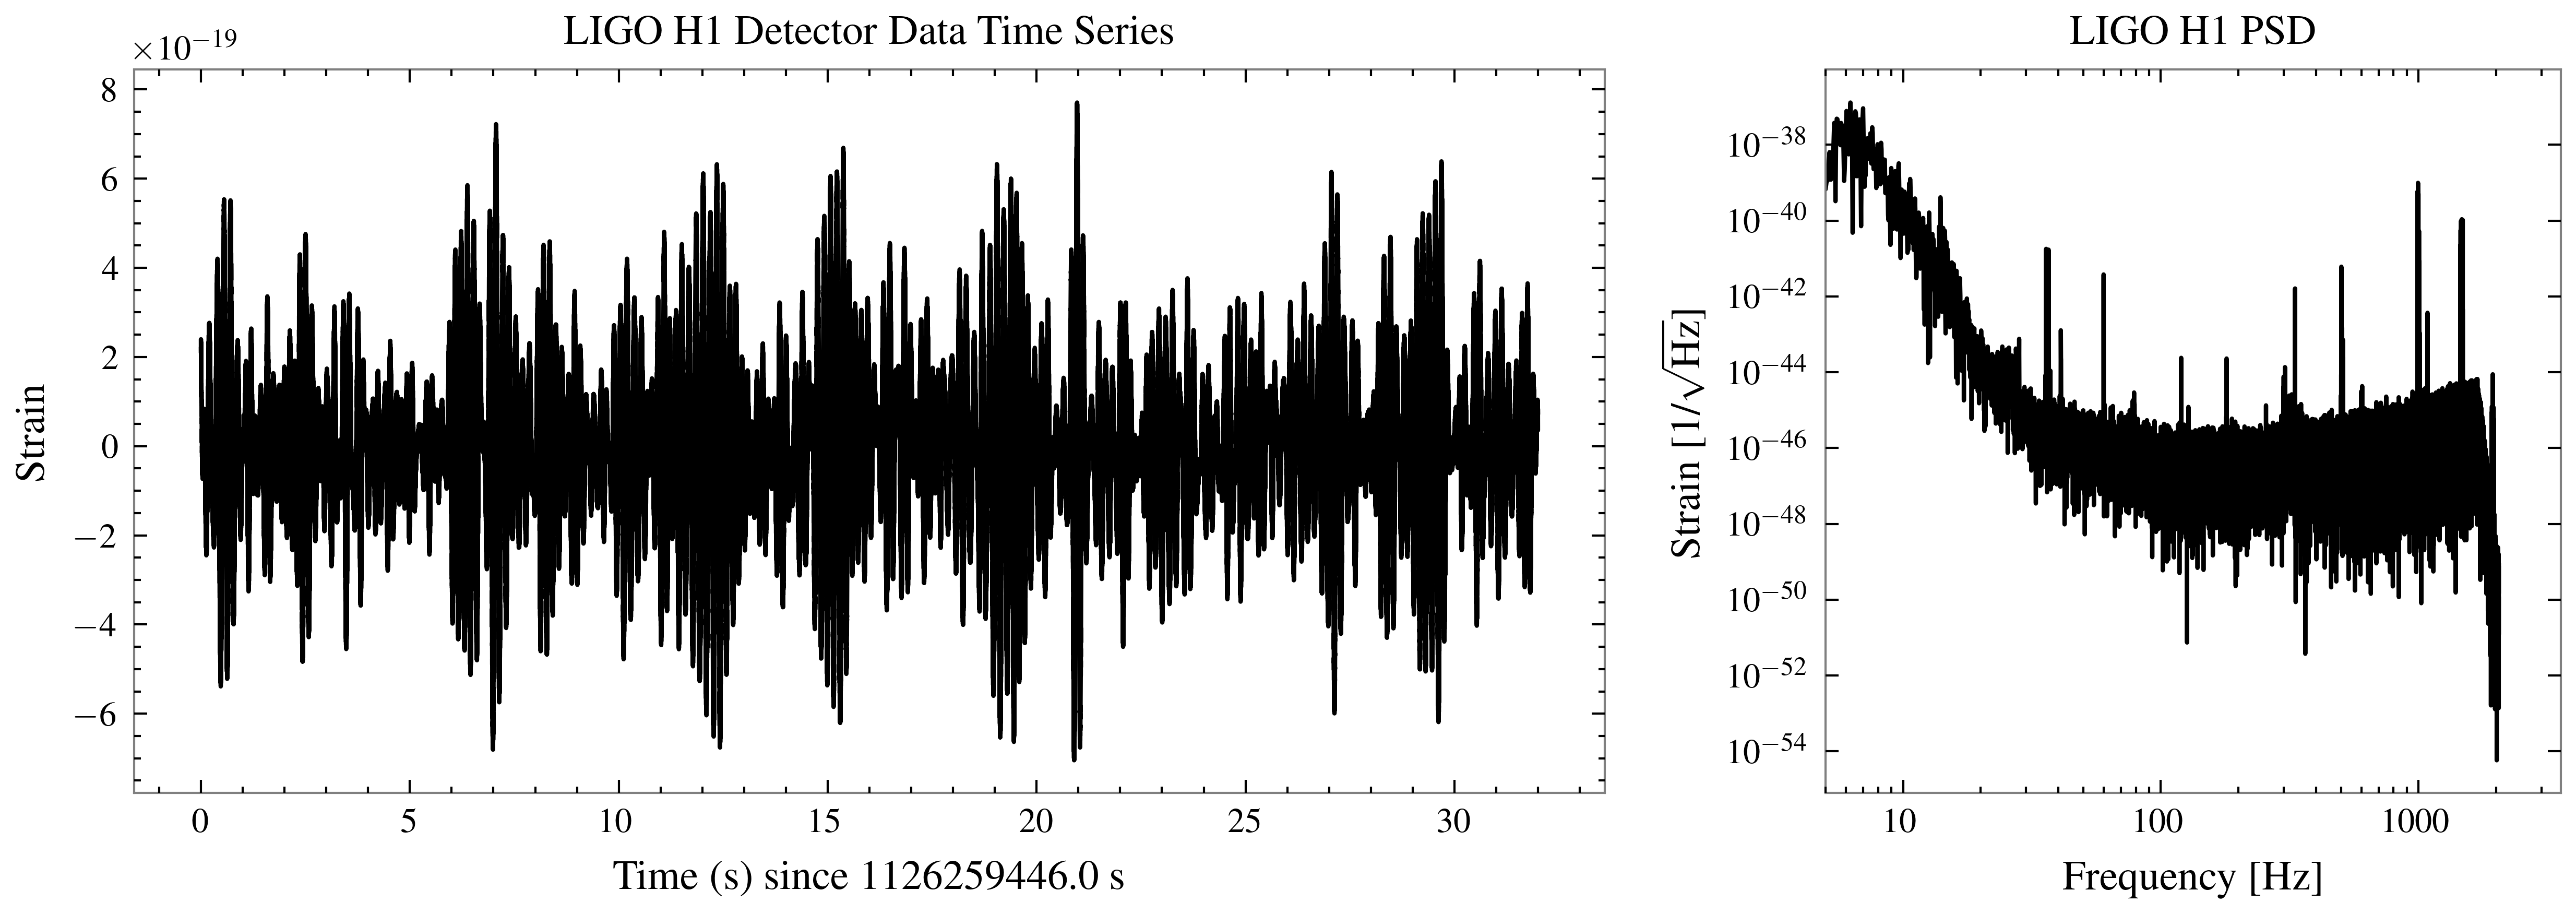

In [5]:
plt.style.use(['science', 'ieee'])

psd = hdata.psd()
# print(len(hdata))

time_vals = np.arange(0, len(hdata) * hdata.dt.value, hdata.dt.value)
# print(len(time_vals))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3), gridspec_kw={'width_ratios': [2,1]})

ax1.plot(time_vals, hdata.value)
ax1.set_title('LIGO H1 Detector Data Time Series')
ax1.set_xlabel(f'Time (s) since {hdata.t0}')
ax1.set_ylabel('Strain')
ax1.grid(False)

freq_vals = np.arange(0, len(psd) * psd.df.value, psd.df.value)

ax2.loglog(freq_vals, psd.value)
ax2.set_xlim(left=5)
ax2.set_title('LIGO H1 PSD')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel(r'Strain [1/$\sqrt{\text{Hz}}$]')
ax2.grid(False)

ax2.xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax2.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))

plt.savefig('paperfigs/sample_h1_psd.png', dpi=300)

In [6]:
hdata = TimeSeries.fetch_open_data('H1', 1263097420, 1263098020)
ldata = TimeSeries.fetch_open_data('L1', 1263097420, 1263098020)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


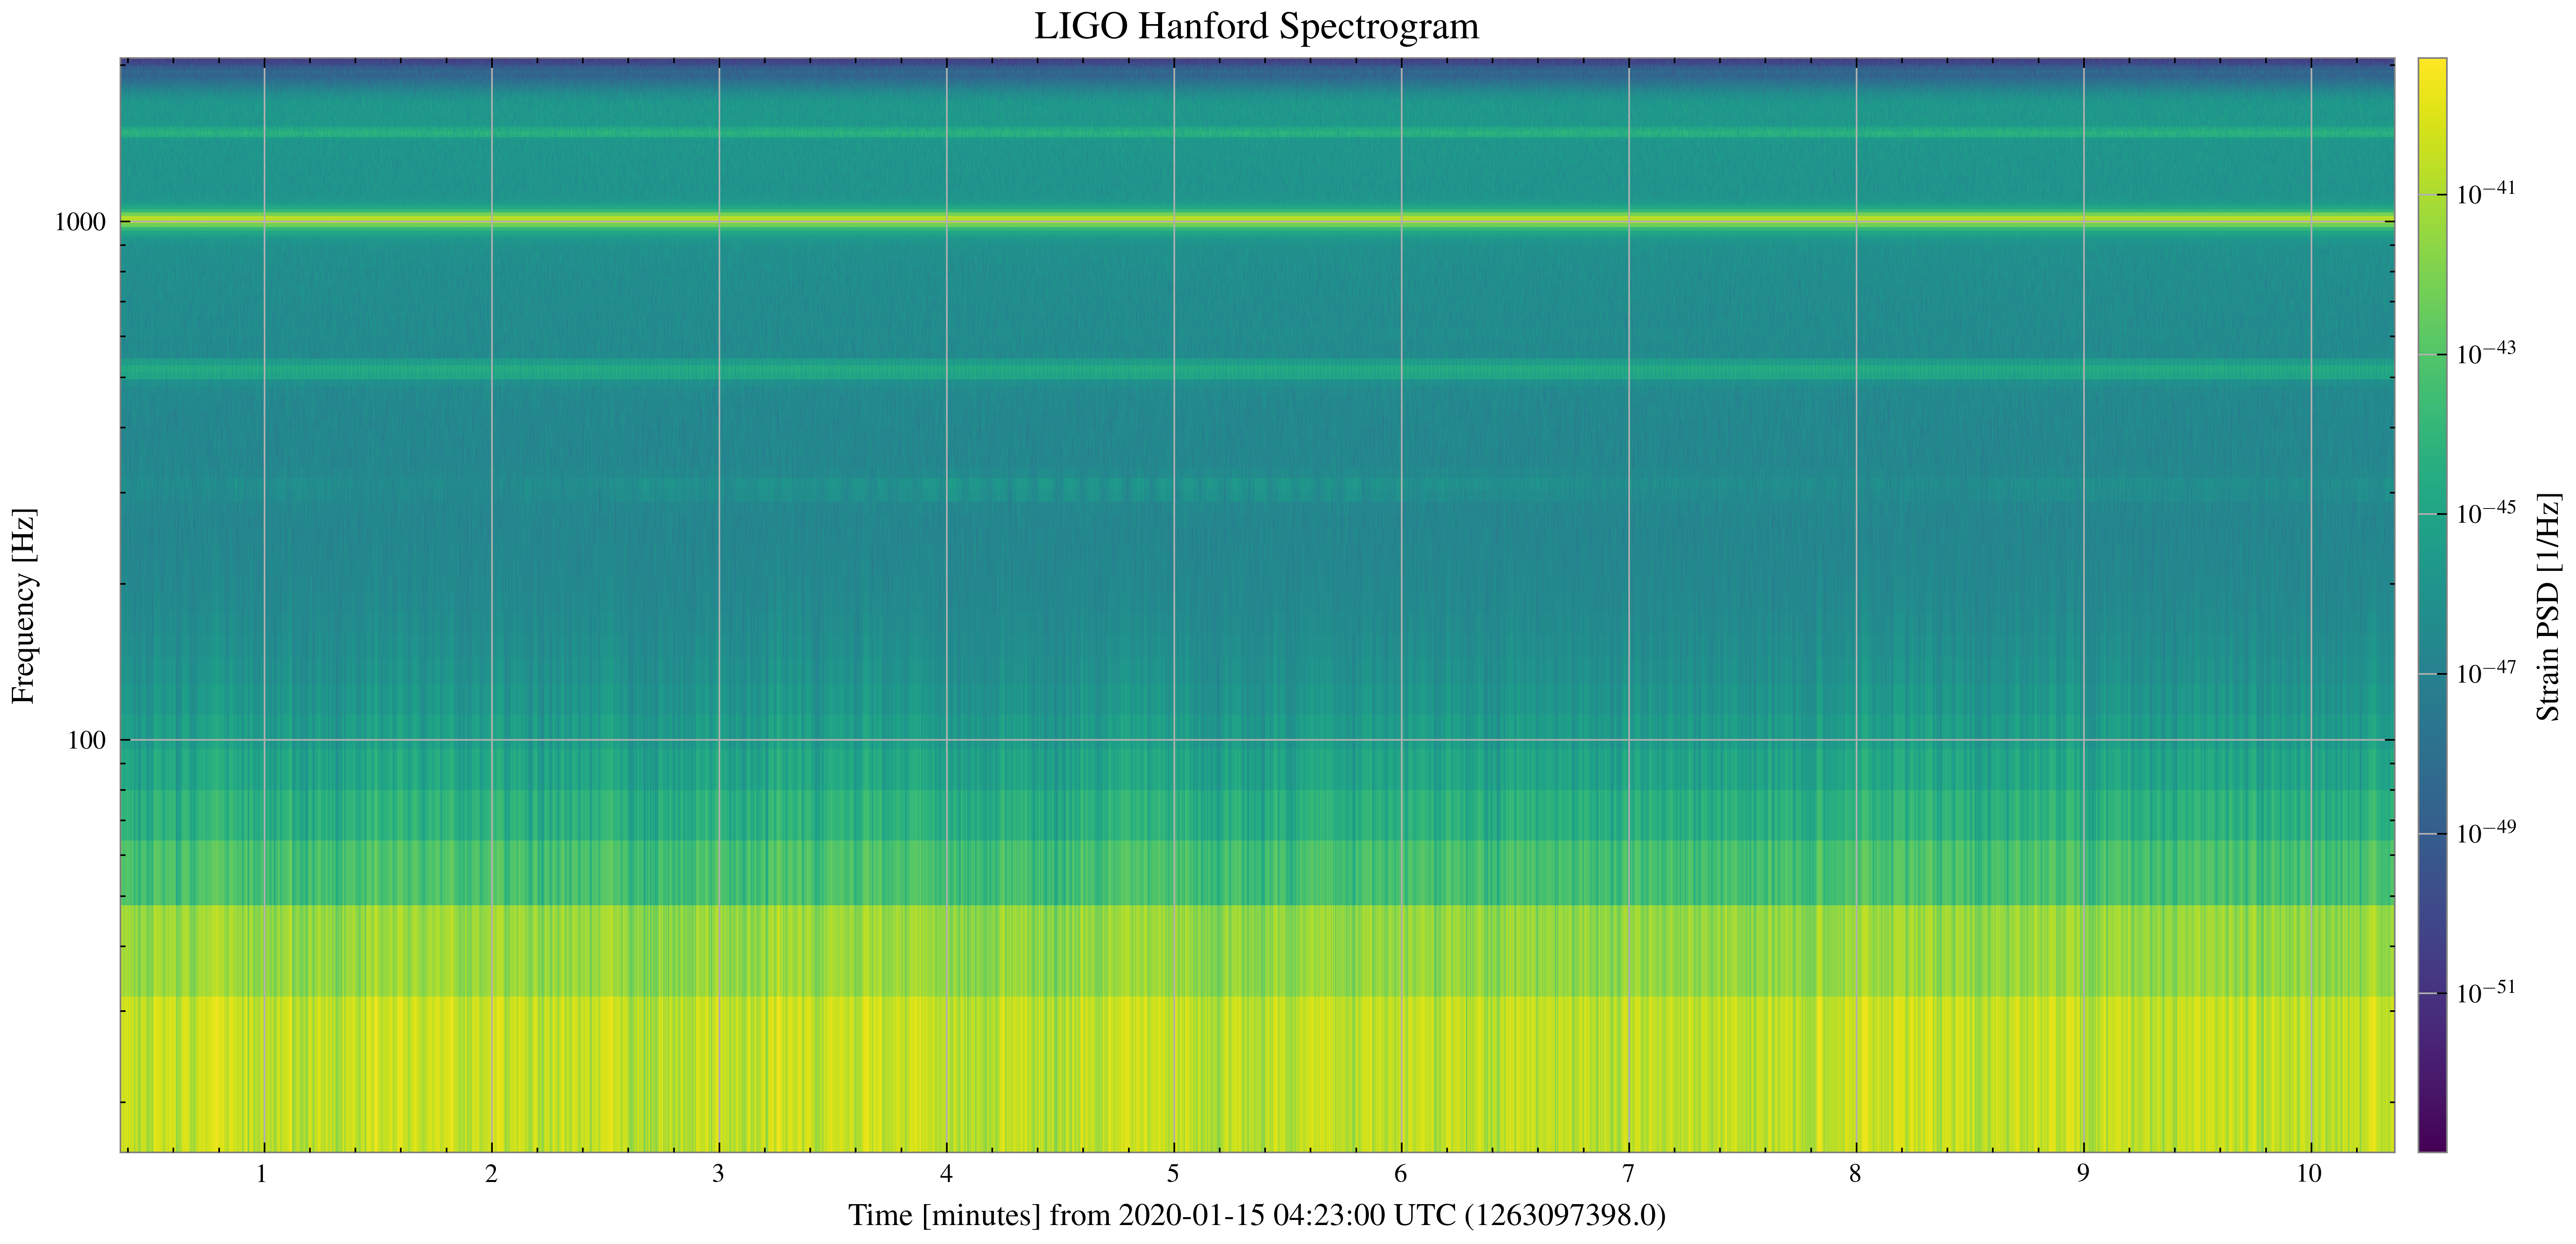

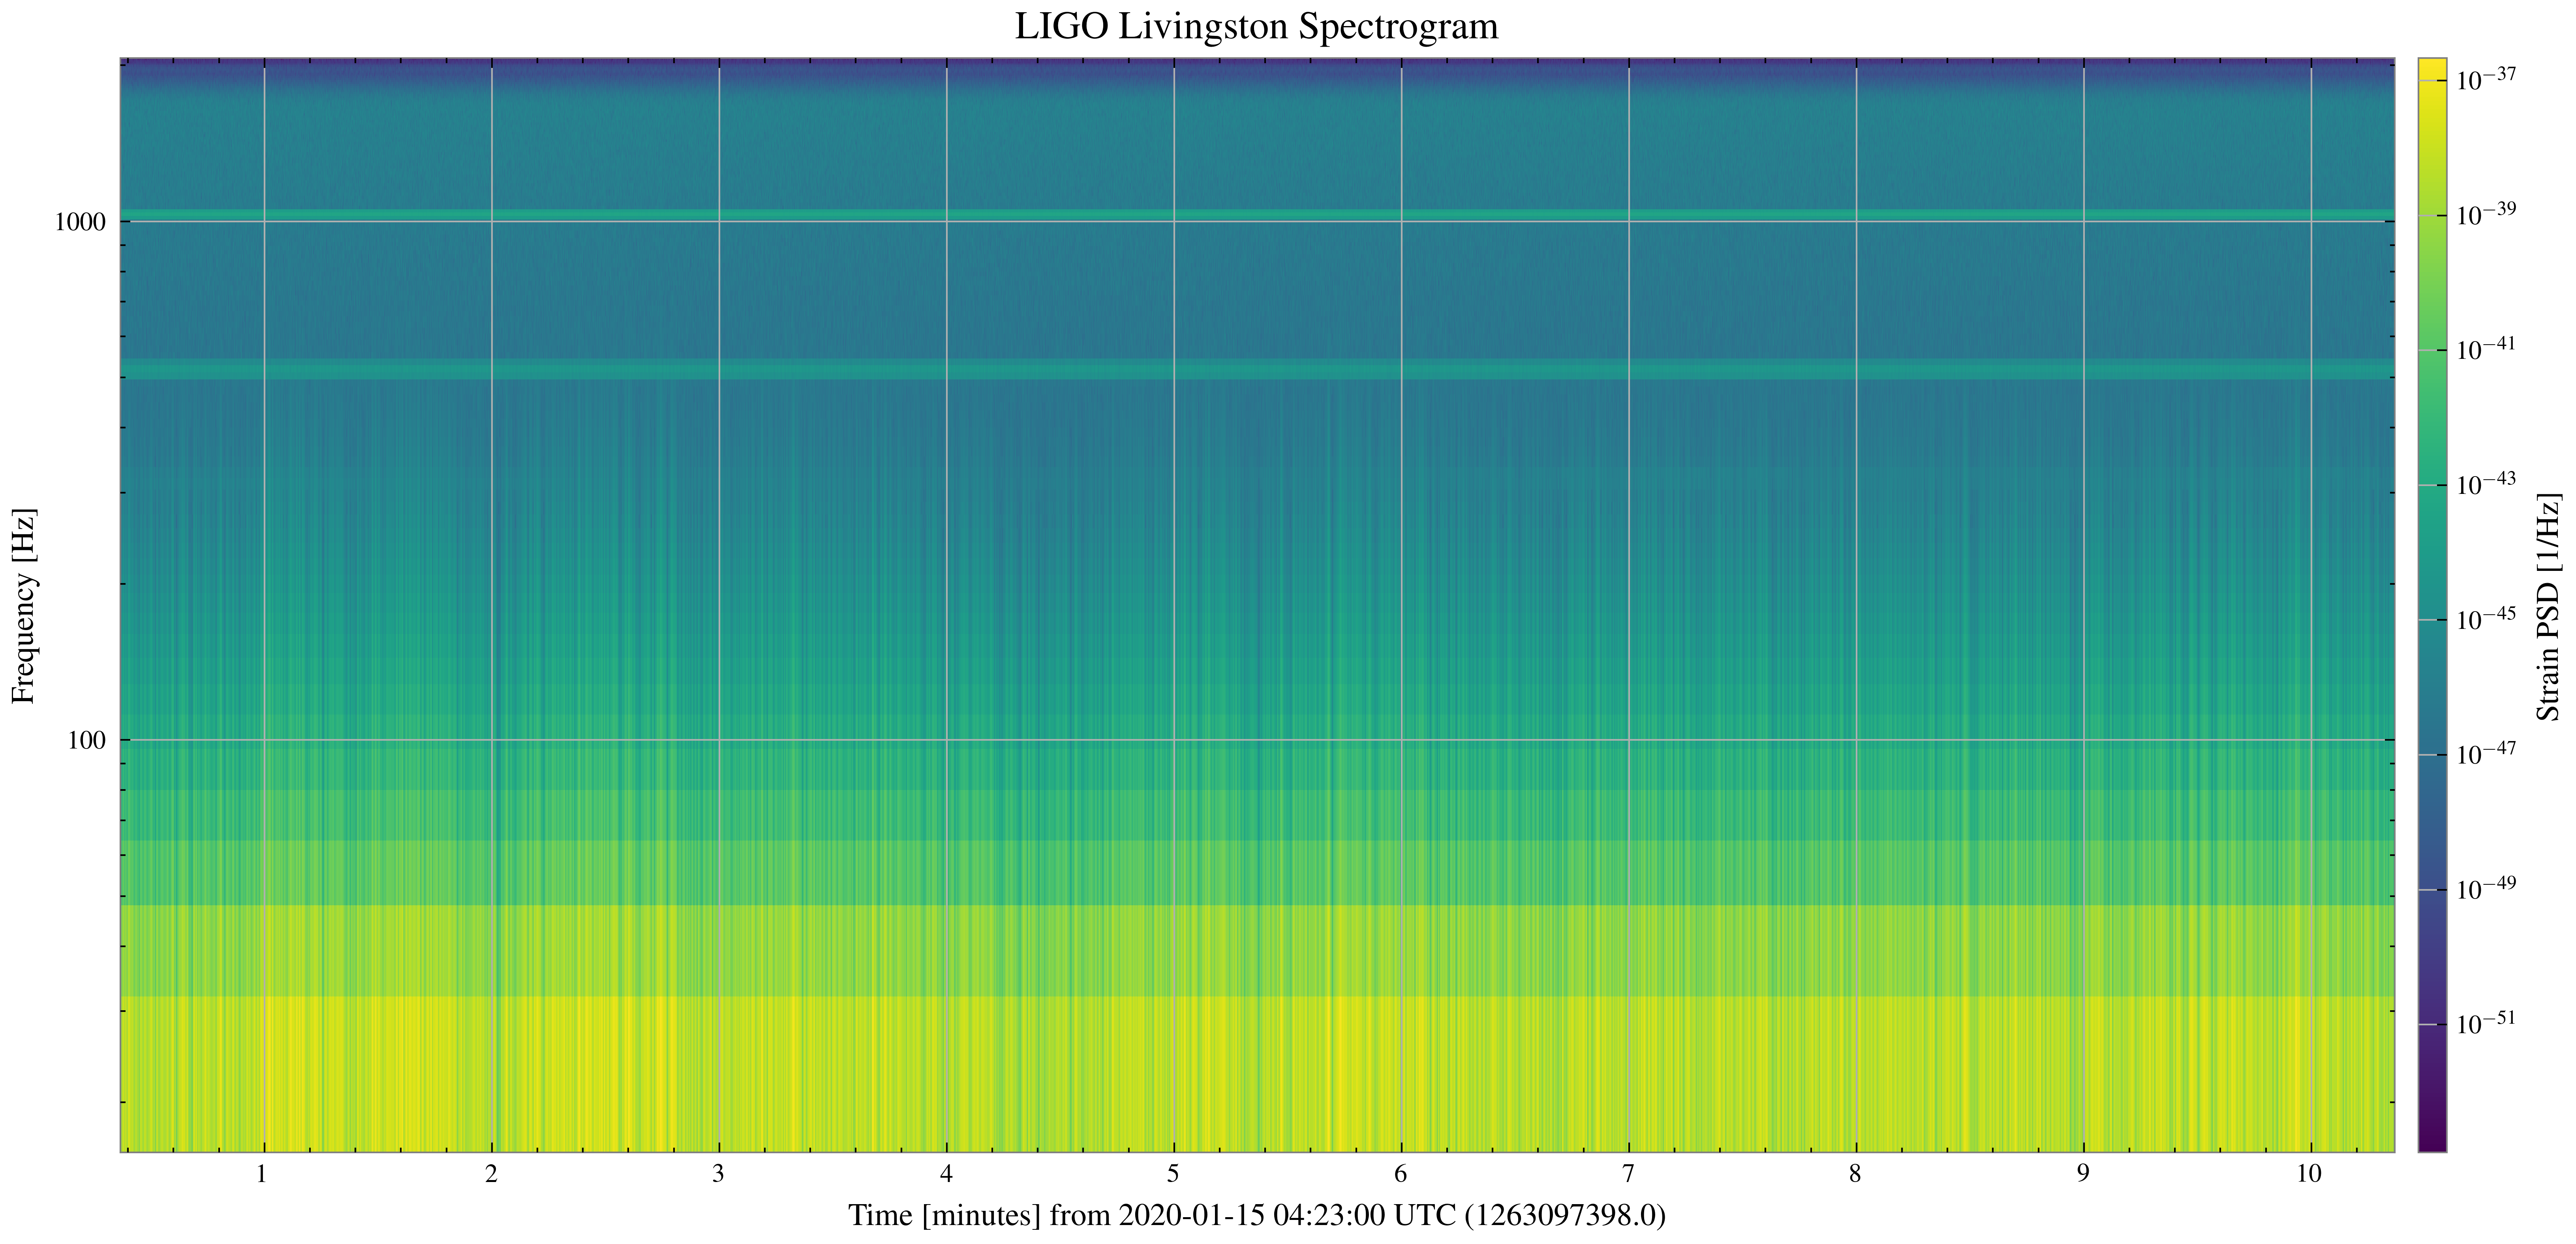

In [7]:
spectrogram = hdata.spectrogram2(fftlength=1/16., overlap=15/256.)
plot = spectrogram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('LIGO Hanford Spectrogram', fontsize=12)
ax.colorbar(label=r'Strain PSD [1/Hz]')
plt.savefig('paperfigs/h1spec.png', dpi=300)
plot.show()

spectrogram = ldata.spectrogram2(fftlength=1/16., overlap=15/256.)
plot = spectrogram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('LIGO Livingston Spectrogram', fontsize=12)
ax.colorbar(label=r'Strain PSD [1/Hz]')
plt.savefig('paperfigs/l1spec.png', dpi=300)
plot.show()

In [8]:
# A function for making a frequency-specific strain time series
# When chosing a frequency, keep in mind the trade-off between frequency resolution and time resolution
# The available frequencies will be multiples of the 1/fftlength; however, they may not be proper
# integer multiples; chose an even power of two in order to get integer frequencies.
def freq_specific_time_series(data, start_time, analysis_length, dt, max_time, freq, fftlength=1/16.):
    lower = start_time
    upper = lower + analysis_length
    values = []
    while (upper <= max_time):
        slice = data.crop(lower, upper)
        psd = slice.psd(fftlength=fftlength)
        values += [psd.value_at(freq).value]
        lower += dt
        upper += dt
    return TimeSeries(values, None, start_time + analysis_length / 2, dt)

In [11]:
# Analyzing original data
min_time1 = 1263097420
max_time1 = 1263098020

In [12]:
hdata1 = TimeSeries.fetch_open_data('H1', min_time1, max_time1)
ldata1 = TimeSeries.fetch_open_data('L1', min_time1, max_time1)

In [13]:
# Next 10 mins
min_time2 = 1263098020
max_time2 = 1263098620
hdata2 = TimeSeries.fetch_open_data('H1', min_time2, max_time2)
ldata2 = TimeSeries.fetch_open_data('L1', min_time2, max_time2)

In [14]:
# Next 10 mins
min_time3 = 1263098620
max_time3 = 1263098620 + 600
hdata3 = TimeSeries.fetch_open_data('H1', min_time3, max_time3)
ldata3 = TimeSeries.fetch_open_data('L1', min_time3, max_time3)

In [15]:
# Next 10 mins
min_time4 = 1263098620 + 600
max_time4 = 1263098620 + 600 + 600
hdata4 = TimeSeries.fetch_open_data('H1', min_time4, max_time4)
ldata4 = TimeSeries.fetch_open_data('L1', min_time4, max_time4)

In [16]:
# Next 10 mins
min_time5 = 1263098620 + 600 + 600
max_time5 = 1263098620 + 600 + 600 + 600
hdata5 = TimeSeries.fetch_open_data('H1', min_time5, max_time5)
ldata5 = TimeSeries.fetch_open_data('L1', min_time5, max_time5)

In [21]:
hfss1 = freq_specific_time_series(hdata1, min_time1, 4, 0.125, max_time1, 304)
lfss1 = freq_specific_time_series(ldata1, min_time1, 4, 0.125, max_time1, 304)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


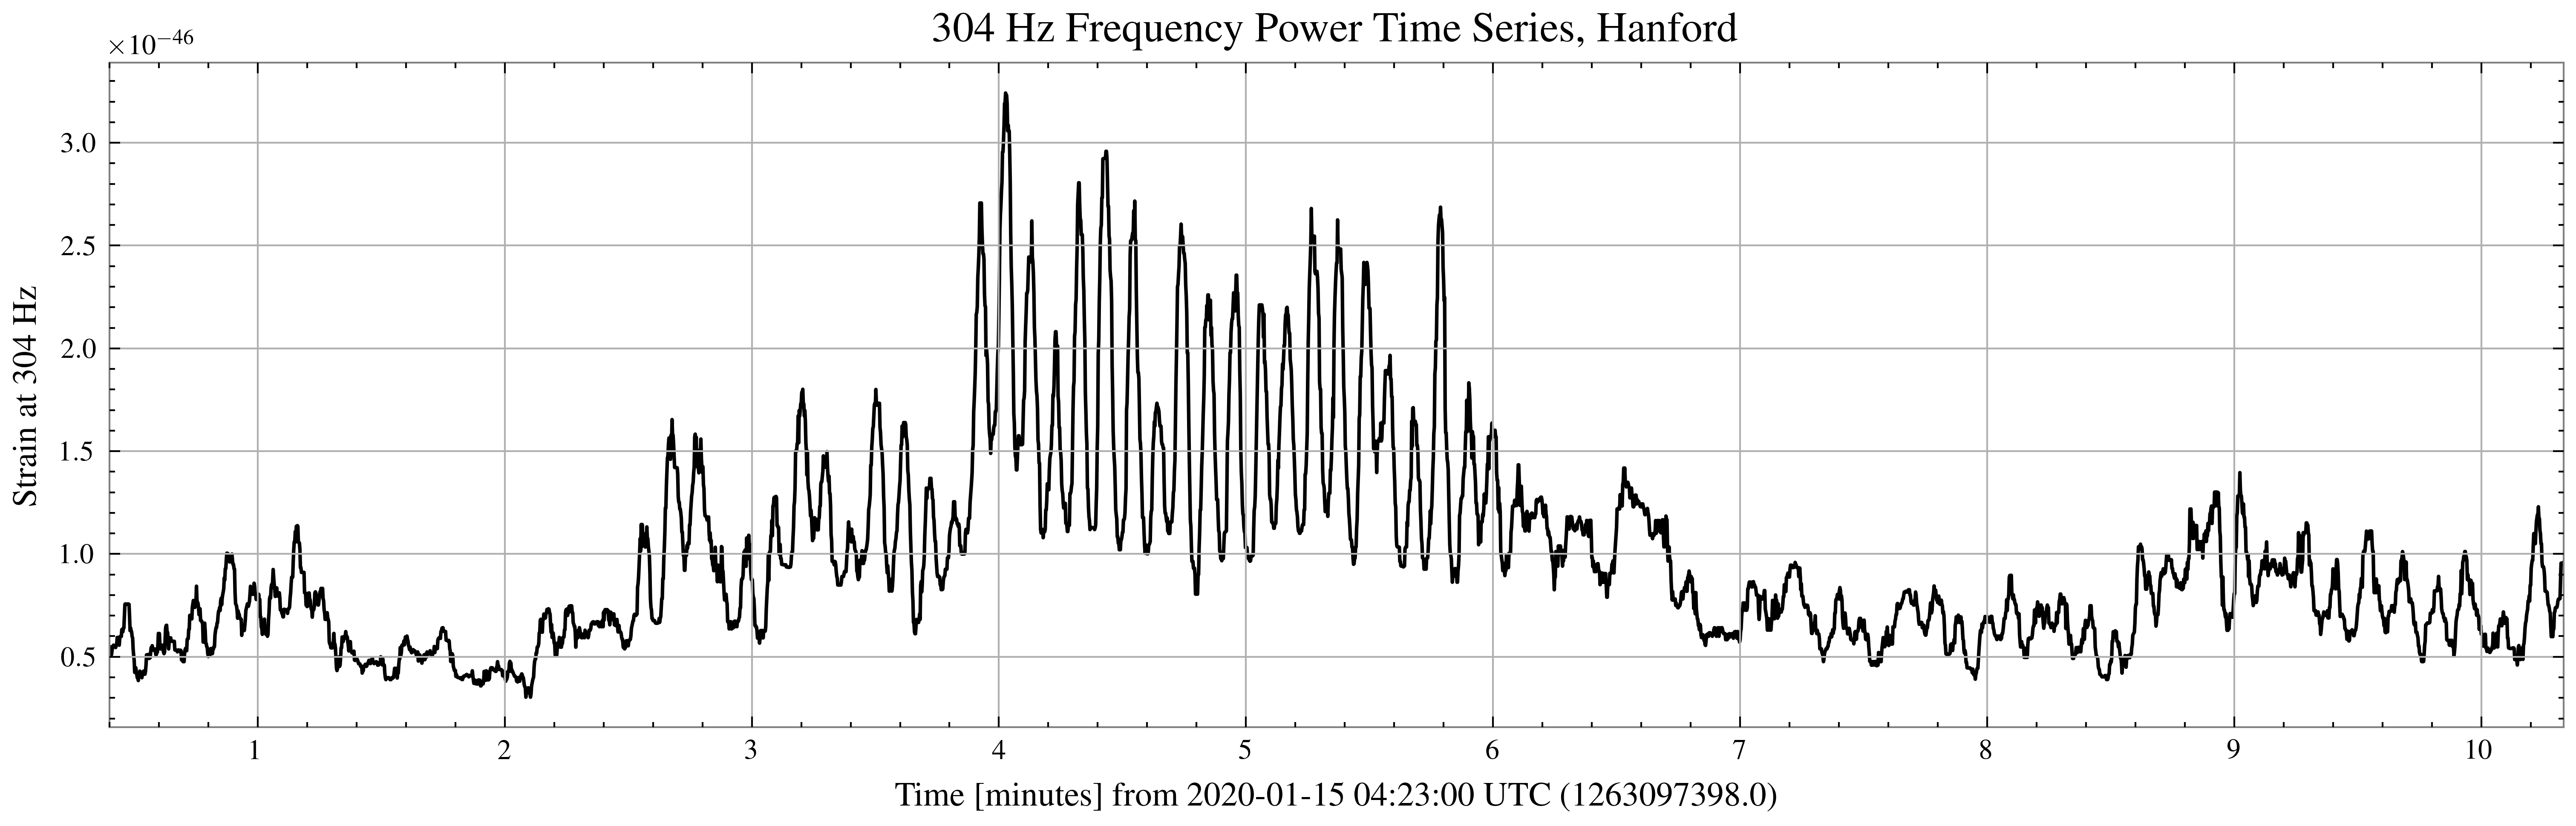

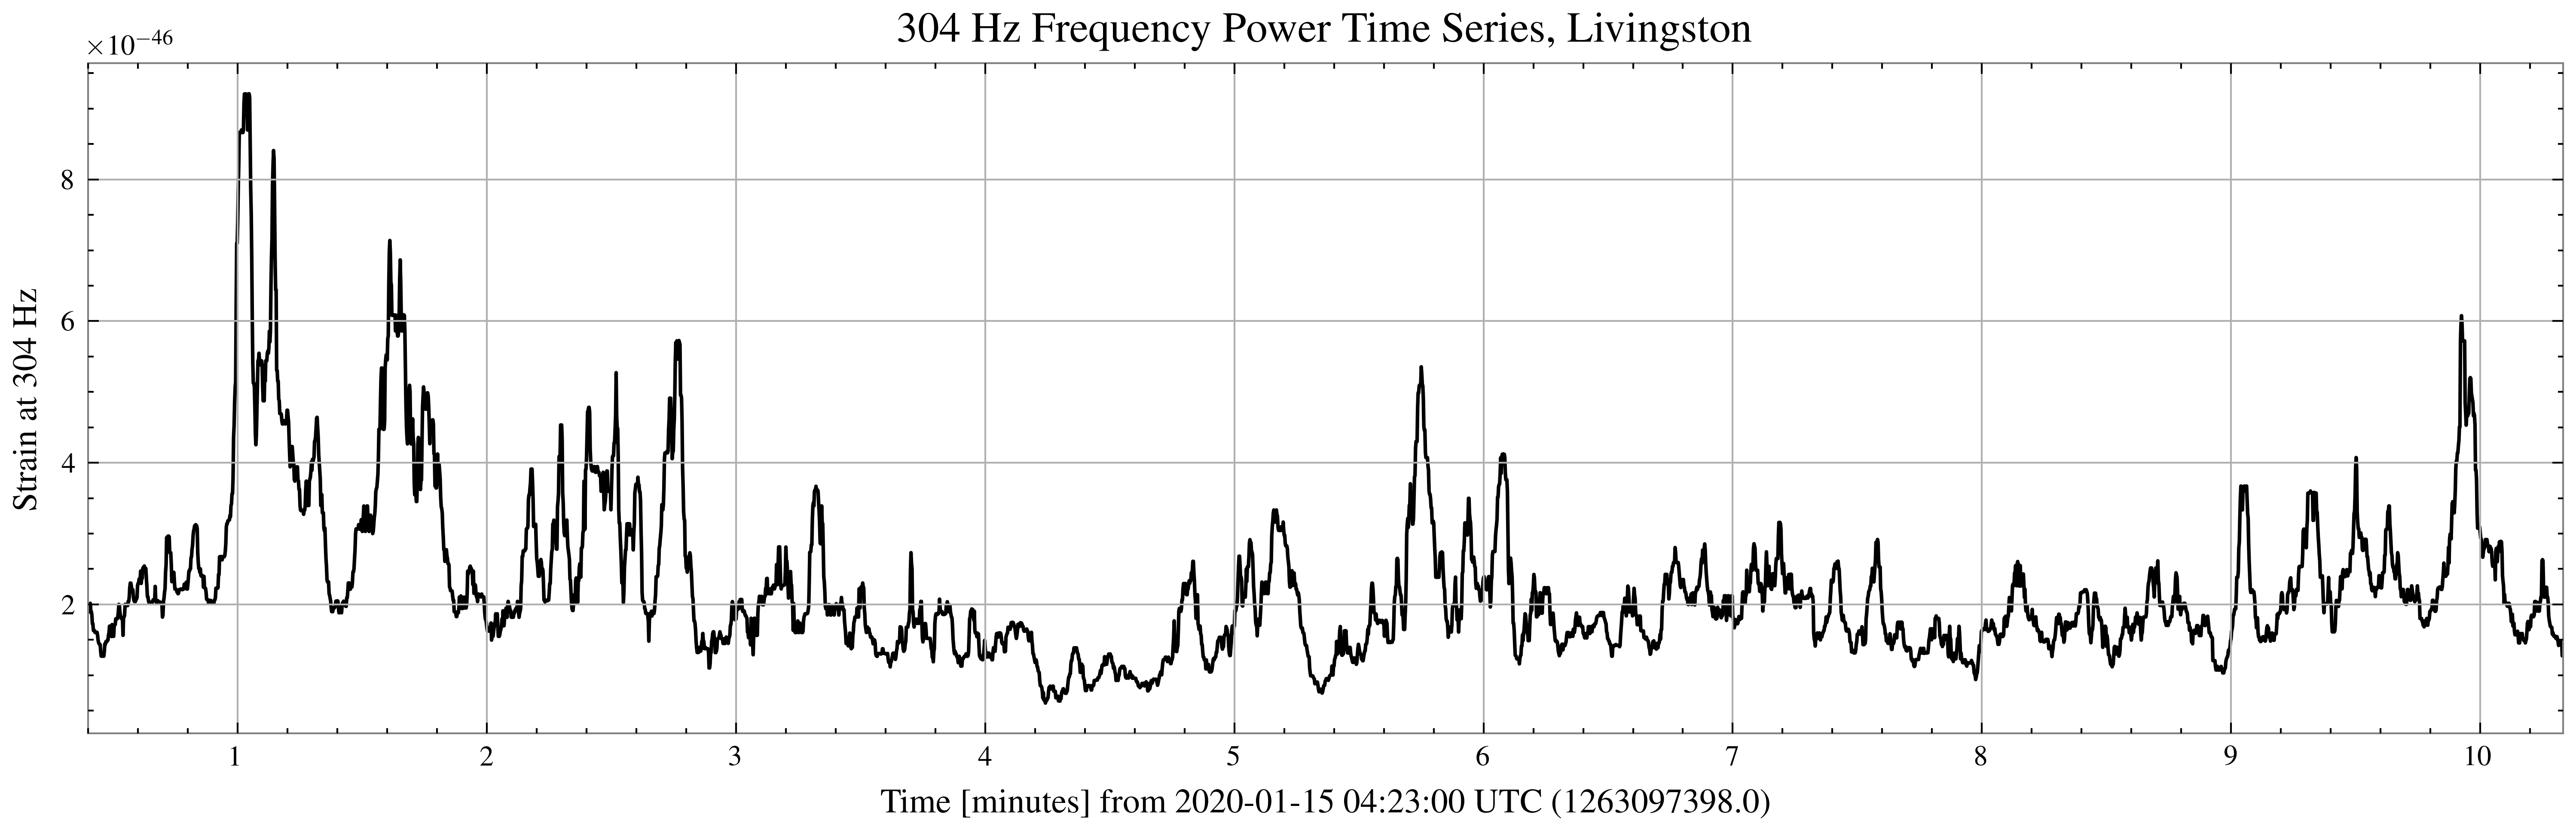

In [26]:
plot = hfss1.plot()
ax = plot.gca()
ax.set_title('304 Hz Frequency Power Time Series, Hanford', fontsize=12)
ax.set_ylabel('Strain at 304 Hz')
plt.savefig('paperfigs/304fpts_hanford.png', dpi=300)
plot.show()

plot = lfss1.plot()
ax = plot.gca()
ax.set_title('304 Hz Frequency Power Time Series, Livingston', fontsize=12)
ax.set_ylabel('Strain at 304 Hz')
plt.savefig('paperfigs/304fpts_livingston.png', dpi=300)
plot.show()